<a href="https://colab.research.google.com/github/VEDAVARSHNI2000/TSF-INTERNSHIP-TASKS/blob/main/veda_intern_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
INTERN TASK-3

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to
make more profit.
● What all business problems you can derive by exploring the data?

In [11]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [12]:
from google.colab import files 
  
  
uploaded = files.upload()



Saving SampleSuperstore.csv to SampleSuperstore.csv


In [13]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv'])) 
print(df)

           Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994 rows x 13 columns]


In [14]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
#Checking the null values 
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
#Checking for duplicated values
df.duplicated().sum()

17

cleaning the dataset that is removing the duplicate values

In [19]:
df.drop_duplicates( inplace = True )

In [20]:
df.duplicated().sum()

0

relationship analysis

In [22]:
correlation=df.corr()

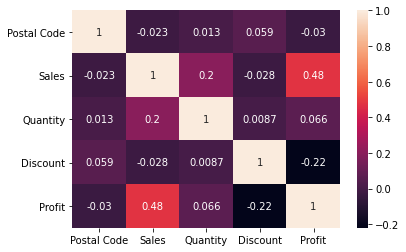

In [23]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True);

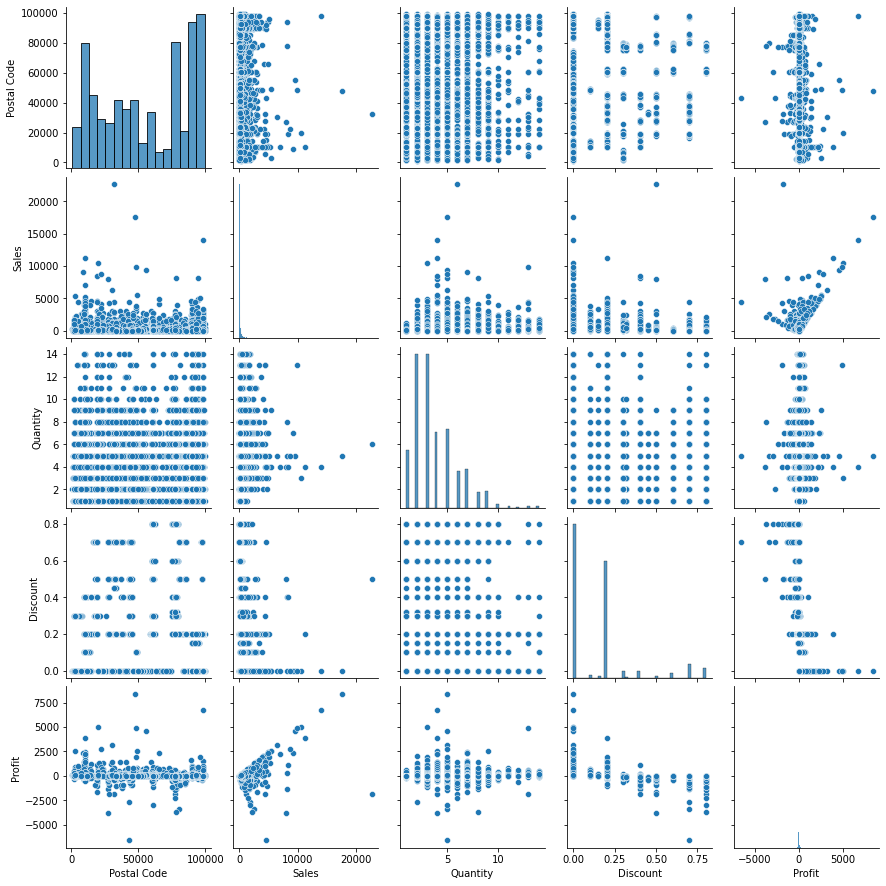

In [24]:
sns.pairplot(df);

visualising profit and class

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


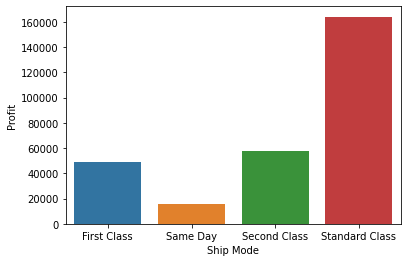

In [25]:
pc = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(pc['Ship Mode'], pc['Profit'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


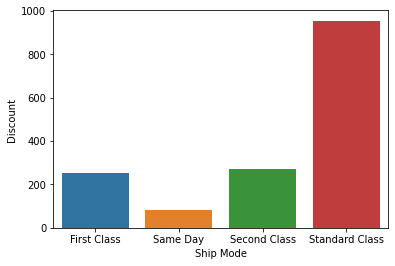

In [26]:
dc = df.groupby(['Ship Mode'], as_index = False)['Discount'].sum()
sns.barplot(dc['Ship Mode'], dc['Discount'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


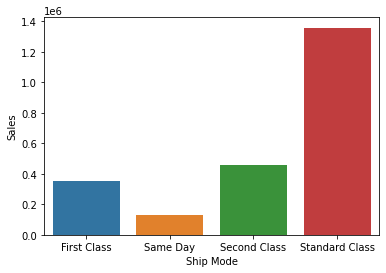

In [28]:

dc = df.groupby(['Ship Mode'], as_index = False)['Sales'].sum()
sns.barplot(dc['Ship Mode'], dc['Sales'])

plotting between profit and category

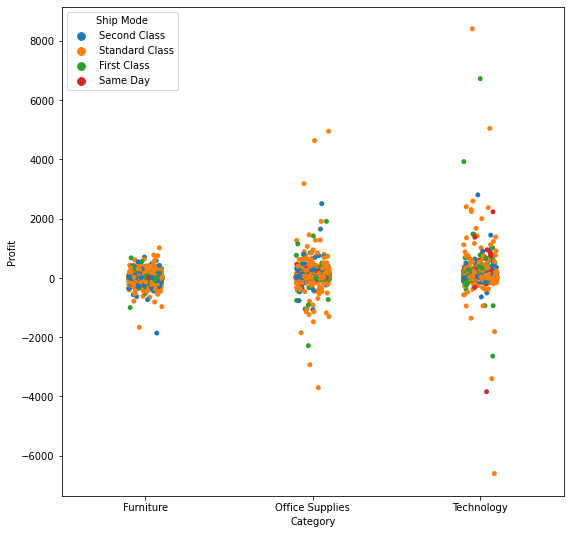

In [29]:
plt.figure(figsize = (9, 9))
sns.stripplot(x='Category',y='Profit',data=df ,hue='Ship Mode')

technology category has the highest profit so that sales need to be more.

In [30]:
s = df.groupby(['Segment'],as_index = False).sum()
s

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


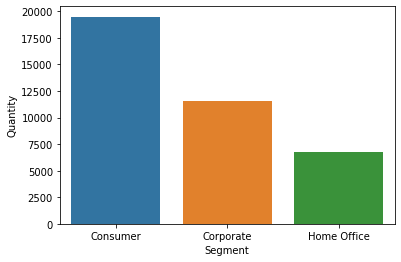

In [31]:
sns.barplot(x = 'Segment', y = 'Quantity', data = s)

 consumers purchases more good quantity so this are the customers that should be more targeted to earn more profit

In [32]:
df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()

,Region,Profit
0,Central,17.100421
1,East,32.163905
2,South,28.857673
3,West,33.927281


visualising using pie charts

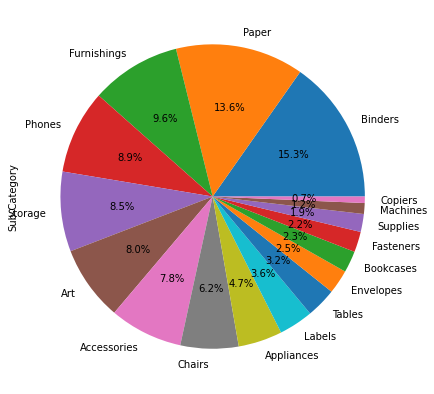

In [38]:
plt.figure(figsize = (7, 7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

 Binders,Paper and Furnishing are the materials which are sold more while copiers,Machines and Supplies are the least sold material.

Text(0.5, 1.0, 'Average profit for Different regions')

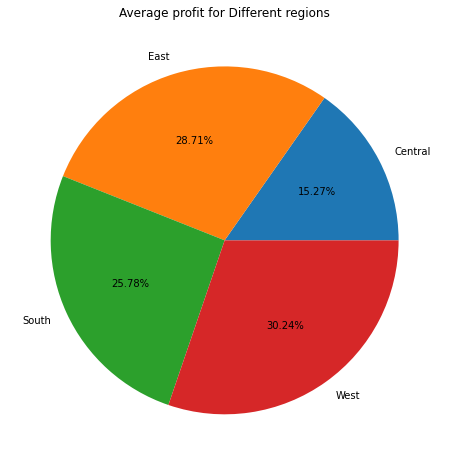

In [39]:
region = ['Central', 'East', 'South', 'West']
profit = [17.093, 32.135, 28.858, 33.849]
plt.pie(profit, labels = region, autopct='%1.2f%%')
plt.title('Average profit for Different regions')

west side has the more profit

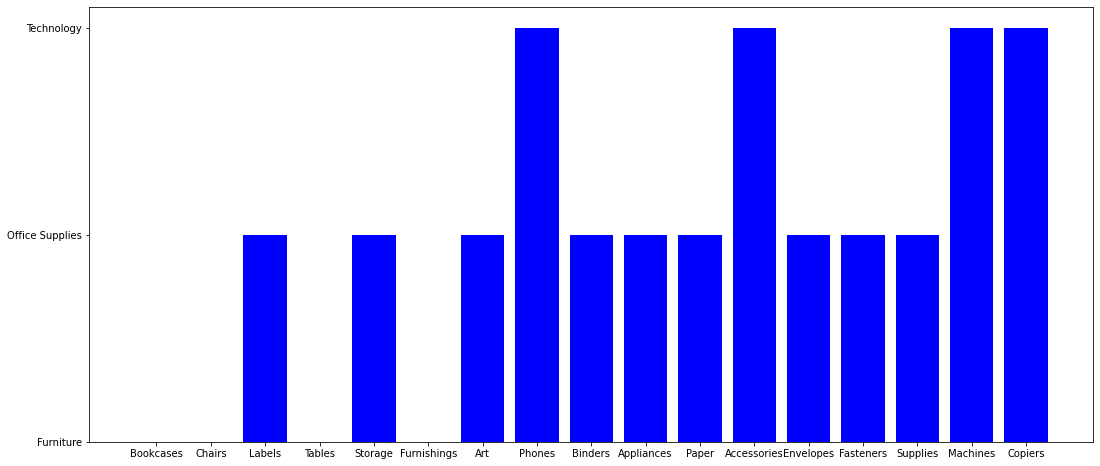

In [36]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=df,color='b');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


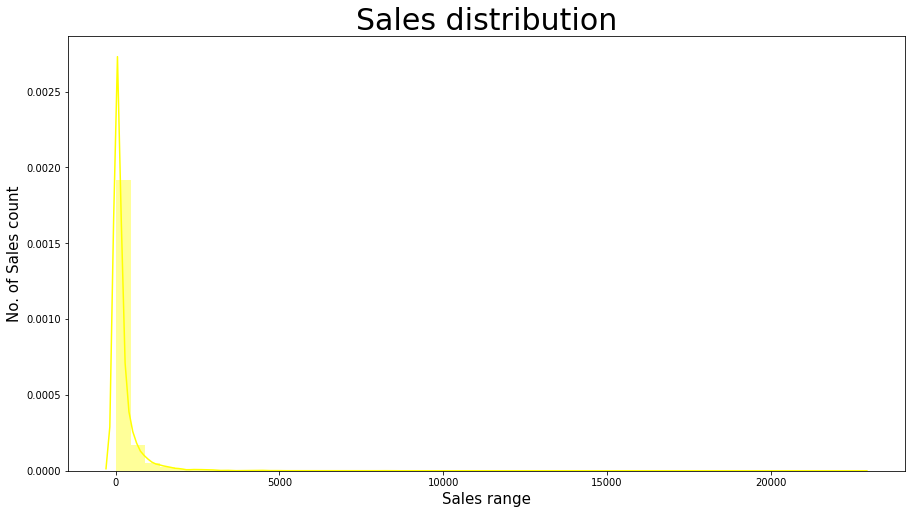

In [41]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df['Sales'], color = 'yellow')
plt.title('Sales distribution', fontsize = 30)
plt.xlabel('Sales range', fontsize = 15)
plt.ylabel('No. of Sales count', fontsize = 15)
plt.show()